In [1]:
import os
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import seaborn as sns # I love this package!
#sns.set_style('white')

import torch

### Loss Trend Check

Sample Size = 200
Min_Loss = 0.842902421951294
Epoch of Best Model = 91


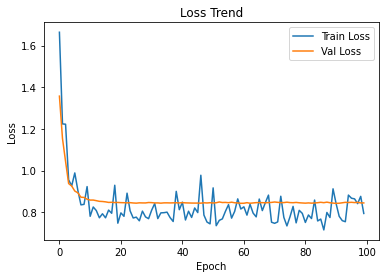

Sample Size = 500
Min_Loss = 0.7453358769416809
Epoch of Best Model = 87


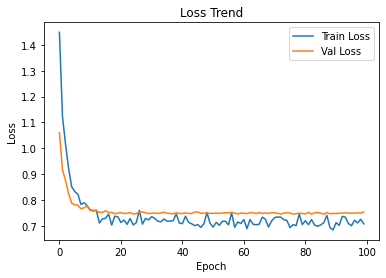

Sample Size = 1000
Min_Loss = 0.689828097820282
Epoch of Best Model = 57


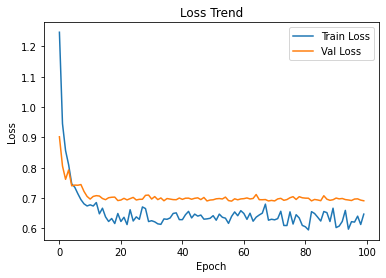

Sample Size = 2000
Min_Loss = 0.6377280354499817
Epoch of Best Model = 9


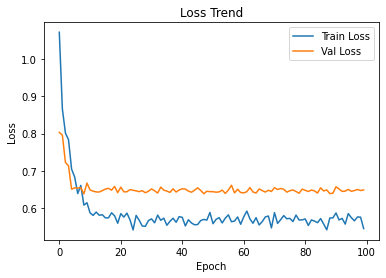

Sample Size = 5000
Min_Loss = 0.5861253142356873
Epoch of Best Model = 68


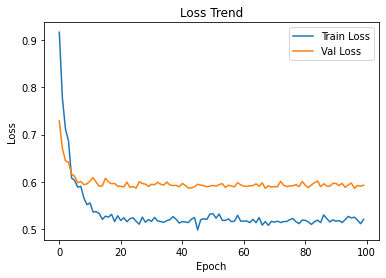

Sample Size = 10000
Min_Loss = 0.5558803677558899
Epoch of Best Model = 23


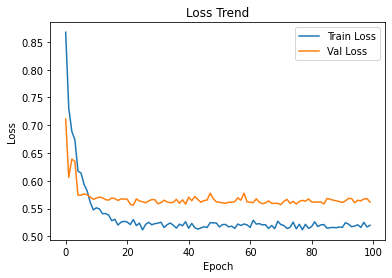

In [2]:
# load check point
sample_sizes = [200, 500, 1000, 2000, 5000, 10000]
for s in sample_sizes:
    print('Sample Size = ' + str(s))
    model_path = f'checkpoint_{s}.pth.tar'
    checkpoint = torch.load(model_path)
    loss_history_train = checkpoint['loss_history_train']
    loss_history_val = checkpoint['loss_history_val']
    #loss_train = [np.mean(l) for l in loss_history_train]
    loss_train = [float(torch.mean(torch.stack(l))) for l in loss_history_train]
    #loss_val = [np.mean(l) for l in loss_history_val]
    loss_val = [float(torch.mean(torch.stack(l))) for l in loss_history_val]
    print("Min_Loss = " + str(min(loss_val)))
    print("Epoch of Best Model = " + str(np.argmin(loss_val) + 1))

    plt.plot(loss_train, label = 'Train Loss')
    plt.plot(loss_val, label = 'Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Trend')
    plt.legend()
    plt.show()

### Model performance

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def plot_roc(attr, target, pred, sample_size):
    """Plot a ROC curve and show the accuracy score and the AUC"""
    fig, ax = plt.subplots()
    auc = roc_auc_score(target, pred)
    acc = accuracy_score(target, (pred >= 0.5).astype(int))
    fpr, tpr, _ = roc_curve(target, pred)
    plt.plot(fpr, tpr, lw = 2, label = attr.title())
    plt.legend(loc = 4, fontsize = 15)
    plt.title(('ROC Curve for Sample Size {sample_size} (Accuracy = {acc:.3f}, AUC = {auc:.3f})'
               .format(sample_size = str(sample_size), acc= acc, auc = auc)),
              fontsize = 15)
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.show()
    return fig

*** loading model from modelbest_200.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:32, 251.79it/s]                                                      


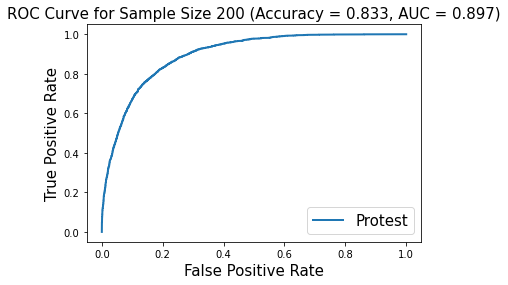

*** loading model from modelbest_500.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:22, 362.27it/s]                                                      


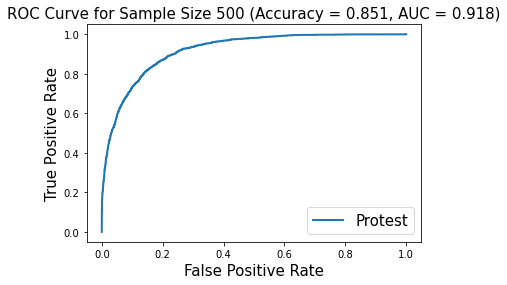

*** loading model from modelbest_1000.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:22, 363.16it/s]                                                      


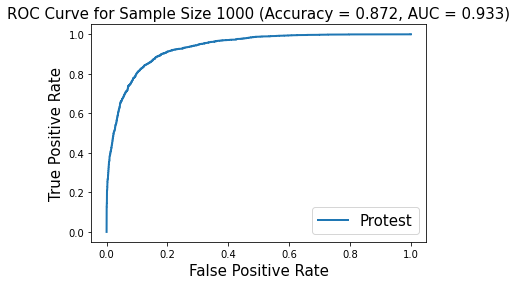

*** loading model from modelbest_2000.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:22, 363.42it/s]                                                      


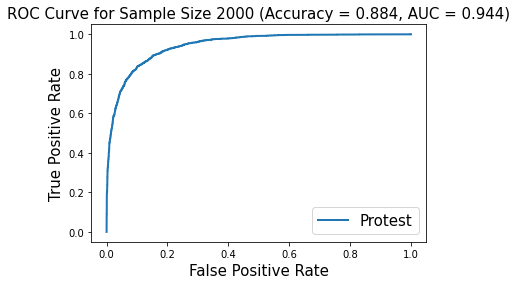

*** loading model from modelbest_5000.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:22, 361.92it/s]                                                      


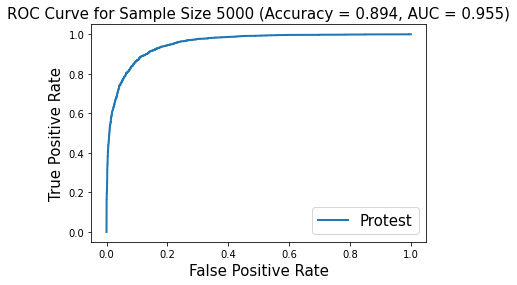

*** loading model from modelbest_10000.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:22, 362.33it/s]                                                      


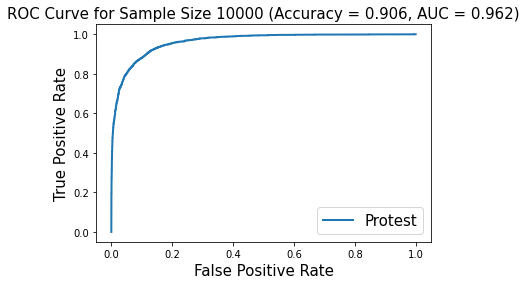

In [4]:
auc_scores = []
acc_scores = []

for s in sample_sizes:
    model_path = f'modelbest_{s}.pth.tar'
    # calculate outputs for the test data with our best model
    output_csv_path = 'pred.csv'
    command = ('python pred.py '
               '--img_dir /UCLA-protest/img/test/ '
               '--output_csvpath {csv_path} '
               '--model {model} --batch_size 4 --cuda'
               .format(csv_path = output_csv_path, model = model_path))


    !{command}

    # load prediction
    df_pred = pd.read_csv(output_csv_path)
    df_pred['imgpath'] = df_pred['imgpath'].apply(os.path.basename)

    # load target
    test_label_path = '/UCLA-protest/annot_test.txt'
    df_target = pd.read_csv(test_label_path, delimiter= '\t')
    attr = "protest"
    target = df_target[attr]
    pred = df_pred[attr]
    fig = plot_roc(attr, target, pred, s)
    auc = roc_auc_score(target, pred)
    acc = accuracy_score(target, (pred >= 0.5).astype(int))
    auc_scores.append(auc)
    acc_scores.append(acc)

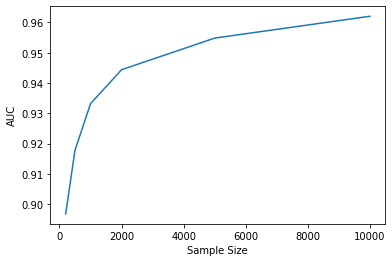

In [6]:
samples = [50, 100, 500, 1000, 5000, 10000, 32611]

plt.plot(sample_sizes, auc_scores)
plt.xlabel('Sample Size')
plt.ylabel('AUC')
plt.show()

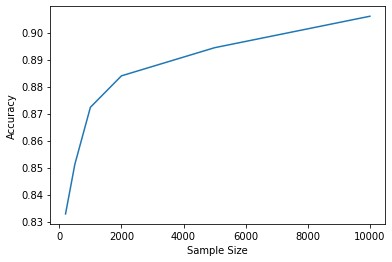

In [7]:
samples = [50, 100, 500, 1000, 5000, 10000, 32611]

plt.plot(sample_sizes, acc_scores)
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
plt.show()

In [10]:
pd.DataFrame(data=np.array((sample_sizes, acc_scores, auc_scores)).T, columns = ['Sample Size', 'acc', 'auc'])

,Sample Size,acc,auc
0,200.0,0.832822,0.896791
1,500.0,0.851220,0.917798
2,1000.0,0.872317,0.933183
3,2000.0,0.883969,0.944396
4,5000.0,0.894395,0.954834
5,10000.0,0.906047,0.962044


In [12]:
pd.DataFrame(acc_scores, index =['Heuristic_0', 'Heuristic_1', 'Heuristic_2', 'Heuristic_3'], 
            columns = ['Method_0', 'Method_1', 'Method_2', 'Method_3'])

,Method_0,Method_1,Method_2,Method_3
Heuristic_0,0.799706,0.836993,0.837360,0.832454
Heuristic_1,0.807556,0.849013,0.839568,0.830124
Heuristic_2,0.804366,0.830982,0.834907,0.838342
Heuristic_3,0.817858,0.837115,0.838219,0.841531


In [15]:
#python pred.py --img_dir /UCLA-protest/img/test/ --output_csvpath pred.csv --model model_best.pth.tar --batch_size 4 --cuda
torch.load('modelbest_2_2.pth.tar')

{'epoch': 93,
 'state_dict': OrderedDict([('conv1.weight',
               tensor([[[[ 1.4429e-02,  1.5806e-02, -1.4337e-02,  ..., -4.0038e-02,
                          -4.2378e-02, -6.9930e-02],
                         [ 4.8690e-03,  6.6122e-03,  1.5542e-02,  ...,  2.5644e-03,
                          -2.0766e-02, -3.8121e-02],
                         [ 2.2850e-02,  2.4189e-02,  1.6495e-02,  ...,  1.0285e-01,
                           6.2468e-02,  5.1871e-02],
                         ...,
                         [-8.2294e-04,  2.8331e-02, -9.6818e-03,  ..., -1.2686e-01,
                          -7.6563e-02,  8.1865e-03],
                         [ 3.6623e-03,  4.8565e-02,  6.2574e-02,  ...,  2.4786e-02,
                          -3.3352e-02, -1.5215e-02],
                         [-7.9704e-02, -3.1625e-02, -1.7264e-02,  ...,  3.5891e-02,
                           2.2780e-02,  2.0933e-03]],
               
                        [[-1.7108e-02,  1.2852e-02,  2.5083e-02,  ...,  

#### Binary Variables

In [7]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def plot_roc(attr, target, pred):
    """Plot a ROC curve and show the accuracy score and the AUC"""
    fig, ax = plt.subplots()
    auc = roc_auc_score(target, pred)
    acc = accuracy_score(target, (pred >= 0.5).astype(int))
    fpr, tpr, _ = roc_curve(target, pred)
    plt.plot(fpr, tpr, lw = 2, label = attr.title())
    plt.legend(loc = 4, fontsize = 15)
    plt.title(('ROC Curve for {attr} (Accuracy = {acc:.3f}, AUC = {auc:.3f})'
               .format(attr = attr.title(), acc= acc, auc = auc)),
              fontsize = 15)
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.show()
    return fig

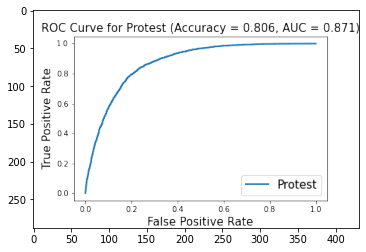

In [11]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/home/ac8839/1006_Capstone_Project/src/won-et-al/files/protest.png', 'r')
imshow(np.asarray(pil_im))

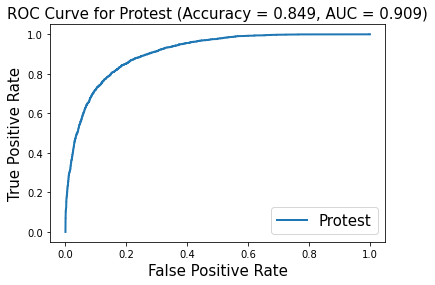

In [8]:
#Best Method Heuristic 1 (Method 1)
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_pred[attr]
fig = plot_roc(attr, target, pred)
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))
# plot ROC curves for visual attributes
for attr in df_pred.columns[3:]:
    target = df_target[attr]
    pred = df_pred[attr][target != '-']
    target = target[target != '-'].astype(int)
    fig = plot_roc(attr, target, pred)
    #fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))

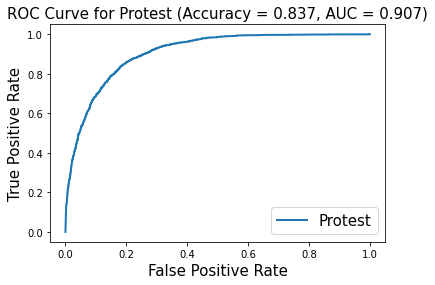

In [13]:
#Best Method Heuristic 0 (Method 1)
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_pred[attr]
fig = plot_roc(attr, target, pred)
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))
# plot ROC curves for visual attributes
for attr in df_pred.columns[3:]:
    target = df_target[attr]
    pred = df_pred[attr][target != '-']
    target = target[target != '-'].astype(int)
    fig = plot_roc(attr, target, pred)
    #fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))

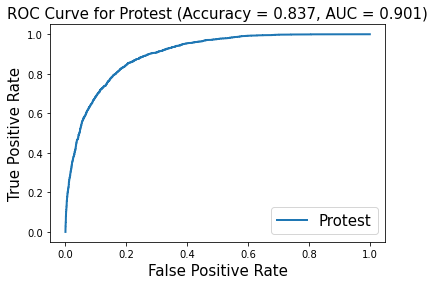

In [16]:
#Best Method Heuristic 2 (Method 2)
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_pred[attr]
fig = plot_roc(attr, target, pred)
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))
# plot ROC curves for visual attributes
for attr in df_pred.columns[3:]:
    target = df_target[attr]
    pred = df_pred[attr][target != '-']
    target = target[target != '-'].astype(int)
    fig = plot_roc(attr, target, pred)
    #fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))

#### Violence

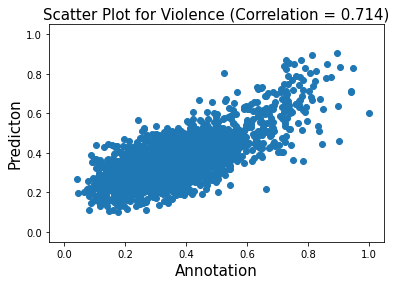

In [11]:
import scipy.stats as stats
attr = 'violence'
pred = df_pred[df_target['protest'] == 1][attr].tolist()
target = df_target[df_target['protest'] == 1][attr].astype(float).tolist()
fig, ax = plt.subplots()
plt.scatter(target, pred, label = attr.title())
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = stats.pearsonr(target, pred)
plt.title(('Scatter Plot for {attr} (Correlation = {corr:.3f})'
            .format(attr = attr.title(), corr= corr)), fontsize = 15)
plt.show()
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))